In [38]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

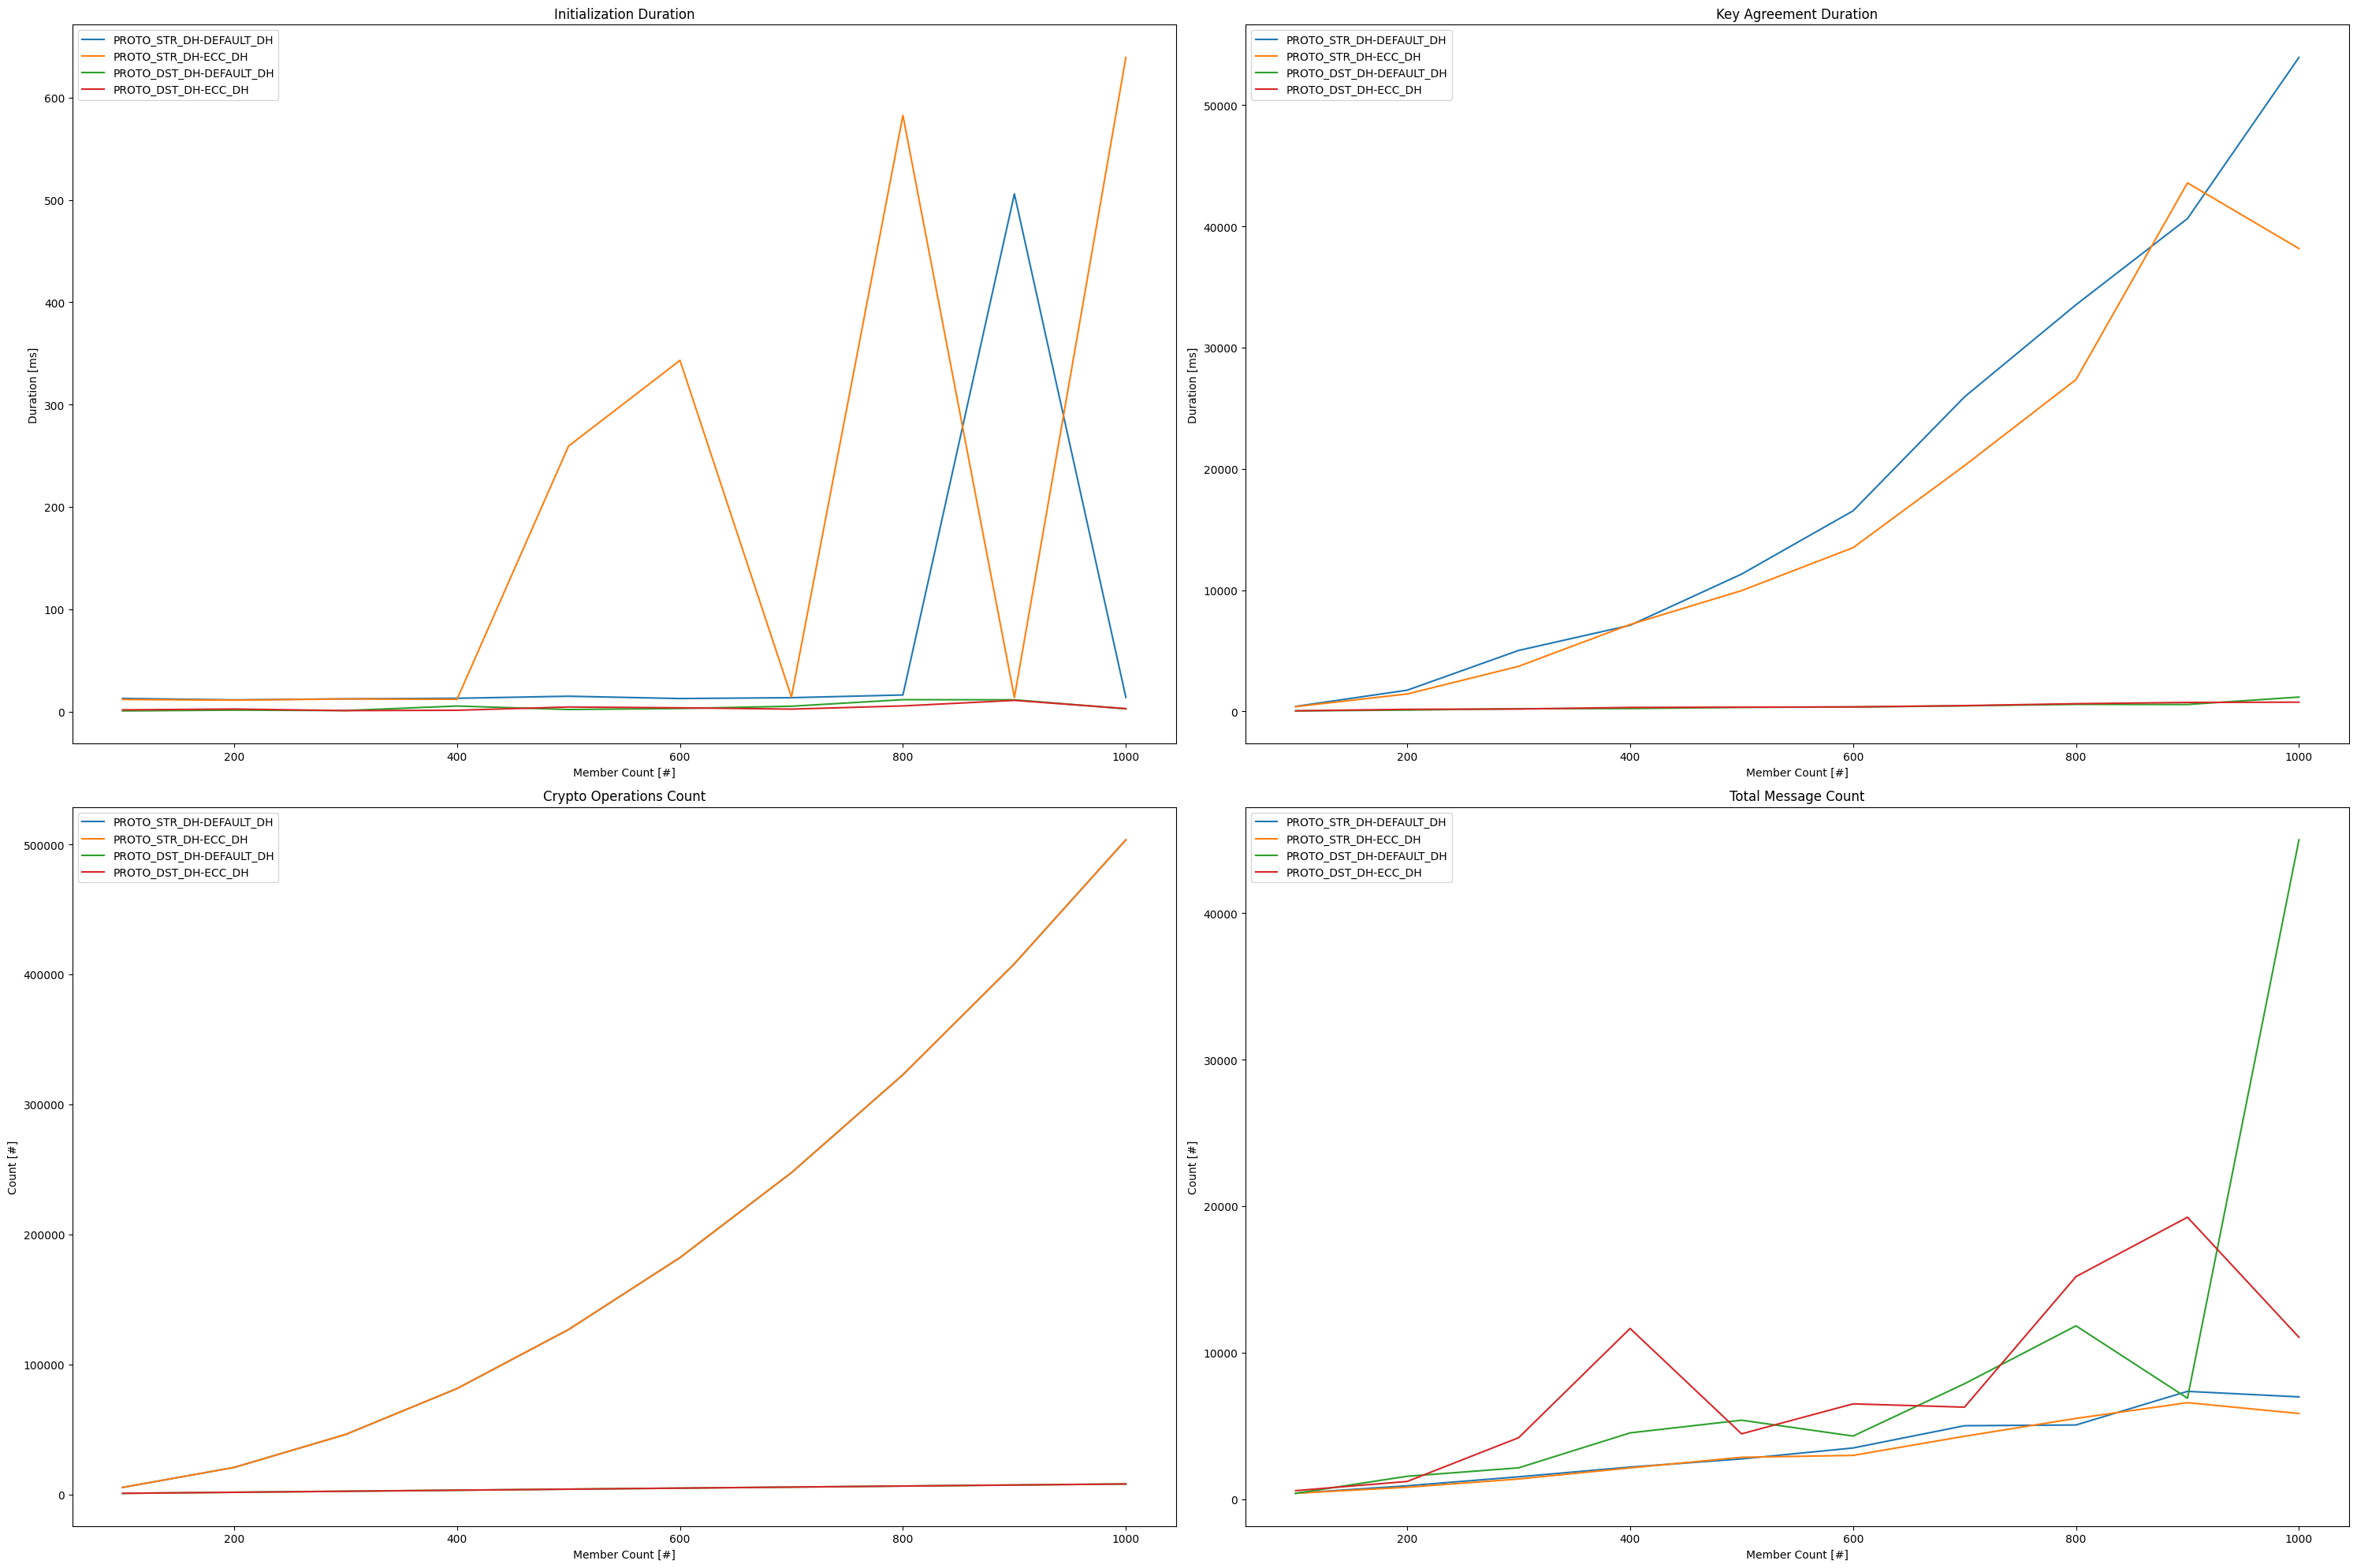

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(30, 20))
ax[0,0].set_title('Initialization Duration')
ax[0,0].set_xlabel('Member Count [#]')
ax[0,0].set_ylabel('Duration [ms]')

ax[0,1].set_title('Key Agreement Duration')
ax[0,1].set_xlabel('Member Count [#]')
ax[0,1].set_ylabel('Duration [ms]')

ax[1,0].set_title('Crypto Operations Count')
ax[1,0].set_xlabel('Member Count [#]')
ax[1,0].set_ylabel('Count [#]')

ax[1,1].set_title('Total Message Count')
ax[1,1].set_xlabel('Member Count [#]')
ax[1,1].set_ylabel('Count [#]')

member_count_axis = np.linspace(100,1000,10)

MESSAGE_COUNTS = ['FIND_MESSAGE_COUNT',
                  'OFFER_MESSAGE_COUNT',
                  'REQUEST_MESSAGE_COUNT',
                  'RESPONSE_MESSAGE_COUNT',
                  'MEMBER_INFO_REQUEST_MESSAGE_COUNT',
                  'MEMBER_INFO_RESPONSE_MESSAGE_COUNT',
                  'SYNCH_TOKEN_MESSAGE_COUNT',
                  'FINISH_MESSAGE_COUNT',
                  'FINISH_ACK_MESSAGE_COUNT',
                  'DISTRIBUTED_RESPONSE_MESSAGE_COUNT']
KEY_AGREEMENT_PROTOCOL = ['PROTO_STR_DH','PROTO_DST_DH']
CRYPTO_ALGORITHM = ['DEFAULT_DH','ECC_DH']

for protocol in KEY_AGREEMENT_PROTOCOL:
    for algorithm in CRYPTO_ALGORITHM:
        initialization_duration_list = list()
        key_agreement_duration_list = list()
        crypto_operations_count_list = list()
        total_message_count_list = list()
        for member_count in range(100, 1100, 100):
            # print("{}-{}-{}".format(protocol,algorithm,member_count))
            df_dh = pd.read_csv(filepath_or_buffer="../statistic_results/{}-{}-{}-#0.csv".format(protocol,algorithm,member_count), header=0, sep=',', dtype=np.longlong)
            df_dh['FULL_DURATION'] = df_dh['DURATION_END']-df_dh['DURATION_START']
            df_dh['KEY_AGREEMENT_DURATION'] = df_dh['DURATION_END']-df_dh['KEY_AGREEMENT_START']
            df_dh['INITIALIZATION_DURATION'] = df_dh['FULL_DURATION']-df_dh['KEY_AGREEMENT_DURATION']
            df_dh['TOTAL_MESSAGE_COUNT'] = 0
            for message_count in MESSAGE_COUNTS:
                df_dh['TOTAL_MESSAGE_COUNT'] += df_dh[message_count];

            # print("INITIALIZATION DURATION: {:.2f}ms".format(df_dh['INITIALIZATION_DURATION'].mean()/1000_000))
            # print("FULL DURATION: {:.2f}ms".format(df_dh['FULL_DURATION'].mean()/1000_000))
            # print("KEY AGREEMENT DURATION: {:.2f}ms".format(df_dh['KEY_AGREEMENT_DURATION'].mean()/1000_000))
            # print("CRYPTO OPERATIONS COUNT: {}".format(df_dh['CRYPTO_OPERATIONS_COUNT'].mean()))
            # print("TOTAL MESSAGE COUNT: {}".format(df_dh['TOTAL_MESSAGE_COUNT'].mean()))

            initialization_duration_list.append(df_dh['INITIALIZATION_DURATION'].mean()/1000_000)
            key_agreement_duration_list.append(df_dh['KEY_AGREEMENT_DURATION'].mean()/1000_000)
            crypto_operations_count_list.append(df_dh['CRYPTO_OPERATIONS_COUNT'].mean())
            total_message_count_list.append(df_dh['TOTAL_MESSAGE_COUNT'].mean())
        ax[0,0].plot(member_count_axis, initialization_duration_list, label="{}-{}".format(protocol,algorithm))
        ax[0,1].plot(member_count_axis, key_agreement_duration_list, label="{}-{}".format(protocol,algorithm))
        ax[1,0].plot(member_count_axis, crypto_operations_count_list, label="{}-{}".format(protocol,algorithm))
        ax[1,1].plot(member_count_axis, total_message_count_list, label="{}-{}".format(protocol,algorithm))
fig.tight_layout()
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
plt.show()